<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Uplift_202309預測**

1. 資料時間
  * 訓練資料：202306+202308活動（0823週三匯元日7523）/data202306_1.csv
  * 測試資料：202309
  * 驗證資料：

2. 資料進度


#Train

##資料探索

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202309.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [2]:
#Complete datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load your May data
sep_data = pd.read_csv('/content/data202309.csv', index_col = 0)
sep_data = sep_data.reset_index(drop = True)
sep_data['換匯發送名單'] = sep_data['換匯發送名單'].astype('str')

##確認模型有學到
#sep_data['跨售行為'] = [-1 if x == 0 else x for x in sep_data['跨售行為']]
#sep_data['跨售行為'] = sep_data['跨售行為'].astype('str')
# Split the data into train and validation sets
np.random.seed(9487)
train_data, val_data = train_test_split(sep_data, test_size=0.2, random_state=42)
# Specify the treatment and outcome columns
unino = sep_data['UNINO']
X_names = sep_data.columns.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為', 'UNINO'])
X_names
#201 columns

Index(['年齡', '公司戶記號', '性別', '呆帳記號_含信用卡', '客戶年收入', '網路會員記號', '網路使用記號_行動銀行',
       '小mma記號', '網路服務記號', '網路使用記號',
       ...
       '客戶行業別_醫療保健', '客戶行業別_金融業', '客戶行業別_電子業', '對帳單寄送記號_0', '對帳單寄送記號_1',
       '對帳單寄送記號_2', '信用卡VIP客戶註記_Y', '外幣存款記號_Y', '信用卡轉呆記號_Y', '信用卡自動扣款記號_Y'],
      dtype='object', length=201)

In [ ]:
import pandas as pd

# Assuming 'treatment' and 'amount' are your column names
cross_table_train = pd.crosstab(train_data['換匯發送名單'], train_data['跨售行為'])
cross_table_val = pd.crosstab(val_data['換匯發送名單'], val_data['跨售行為'])

# Display the cross tables
print("Cross Table for Training Data:")
print(cross_table_train)

print("\nCross Table for Validation Data:")
print(cross_table_val)


Cross Table for Training Data:
跨售行為        -1     1
換匯發送名單              
0       808932  3133
1        34399   815

Cross Table for Validation Data:
跨售行為        -1    1
換匯發送名單             
0       202396  784
1         8459  181


## CasualML_uplift

* 記錄模型時間及存下模型(CasualML_uplift_202306_1/2/3/4/5.pkl)
* 分別存下T = 0/T = 1

In [2]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.4/909.4 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 36.1 MB/s eta 0:00:00
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.8 MB/

In [3]:
!pip install duecredit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.9/179.9 kB 7.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import duecredit

from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.inference.tree import CausalRandomForestRegressor
from causalml.metrics import plot_gain, get_cumgain
from sklearn.model_selection import train_test_split

import importlib
print(importlib.metadata.version('causalml') )

0.14.1


In [4]:
##用Subsets跑
import pandas as pd
import random
##Split dataset
random.seed(42)
# Load your May data
#Shuffle the dataset
train_data.sample(frac = 1, random_state = 42).reset_index(drop = True)
#num_subset
num_subset = 5
#subset_size
subset_size = len(train_data)//num_subset

subsets = []
for i in range(num_subset):
  start_idx = i* subset_size
  end_idx = (i+1)* subset_size
  subset = train_data.iloc[start_idx: end_idx]
  subsets.append(subset)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847279 entries, 457551 to 121958
Columns: 205 entries, UNINO to 信用卡自動扣款記號_Y
dtypes: float64(111), int64(92), object(2)
memory usage: 1.3+ GB


In [ ]:
#節省RAM容量 先將june_data drop掉
import gc
del sep_data
gc.collect()

34

In [5]:
#16min 5s
%%time
import pickle

for i in range(0,5):
  df = subsets[i]
  #df.drop(columns = 'UNINO', inplace = True)
  uplift_model = UpliftRandomForestClassifier(control_name='0')

  uplift_model.fit(df[X_names].values,
                 treatment=df['換匯發送名單'].values,
                 y=df['跨售行為'].values)
  print('Finish running uplift_202309_'+ str(i+1))
  #Save model
  # Open a file and use dump()
  with open('/content/drive/MyDrive/Model/CasualML_uplift_202309_'+ str(i+1) + '.pkl', 'wb') as file:
      # A new file will be created
      pickle.dump(uplift_model, file)

Finish running uplift_202309_1
Finish running uplift_202309_2
Finish running uplift_202309_3
Finish running uplift_202309_4


invalid value encountered in divide


Finish running uplift_202309_5
CPU times: user 16min 5s, sys: 11min 21s, total: 27min 26s
Wall time: 17min 6s


In [6]:
%%time
df_res = uplift_model.predict(train_data[X_names].values, full_output=True)
print(df_res.shape)
df_res

(847279, 5)
CPU times: user 1min 30s, sys: 5.11 s, total: 1min 36s
Wall time: 1min 42s


,0,1,recommended_treatment,delta_1,max_delta
0,0.002841,0.026834,1,0.023994,0.023994
1,0.003275,0.022348,1,0.019073,0.019073
2,0.002312,0.030413,1,0.028101,0.028101
3,0.003431,0.021427,1,0.017995,0.017995
4,0.008011,0.019578,1,0.011567,0.011567
...,...,...,...,...,...
847274,0.002581,0.030851,1,0.028269,0.028269
847275,0.027176,0.026416,0,-0.000760,-0.000760
847276,0.004561,0.022531,1,0.017971,0.017971
847277,0.002786,0.030443,1,0.027657,0.027657


In [ ]:
#RAM限制無法使用平行方式運算，若環境更好可以考慮加速
%%time
import pickle
import pandas as pd

def load_and_predict(i, df):
    model_path = f"/content/drive/MyDrive/Model/CasualML_uplift_202309_{i}.pkl"
    model = pickle.load(open(model_path, "rb"))
    df_res = model.predict(train_data[X_names].values, full_output=True)
    df[f'Uplift_{i}|T=0'] = df_res[:, 0]
    df[f'Uplift_{i}|T=1'] = df_res[:, 1]
    print(f'Finish running uplift_202309_{i}')
    return df

# 循环运行五个模型
result = pd.DataFrame()
for i in range(1, 6):
    result = load_and_predict(i, result)

# 计算均值
T_cols = [f'Uplift_{i}|T=0' for i in range(1, 6)]
T1_cols = [f'Uplift_{i}|T=1' for i in range(1, 6)]

res = train_data[['UNINO','換匯基因標籤','換匯發送名單','TOTALNTAMOUNT','跨售行為']]
res['Uplift_mean|T=0'] = result[T_cols].mean(axis=1)
res['Uplift_mean|T=1'] = result[T1_cols].mean(axis=1)
res['Uplift_mean'] = res['Uplift_mean|T=1'] - res['Uplift_mean|T=0']

# 结果
res

Finish running uplift_202309_1
Finish running uplift_202309_2
Finish running uplift_202309_3
Finish running uplift_202309_4
Finish running uplift_202309_5
CPU times: user 2min 12s, sys: 3.96 s, total: 2min 15s
Wall time: 2min 23s



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean
457551,H8225993450,62.5926,0,0,-1,-0.999875,-0.997675,0.002200
565995,J2750863690,77.9054,0,0,-1,-0.999884,-0.995941,0.003943
258766,H1782646640,67.6935,0,0,-1,-0.999693,-0.993156,0.006537
38205,A2527929550,77.9133,1,0,-1,-0.999243,-0.994968,0.004275
268669,F2793340610,94.4490,0,0,-1,-0.998446,-0.999422,-0.000975
...,...,...,...,...,...,...,...,...
110268,F1746010820,71.7632,0,0,-1,-0.990456,-0.982372,0.008084
259178,F2754533130,96.4844,0,0,-1,-0.999484,-0.994234,0.005249
131932,F1511072300,70.9035,0,0,-1,-0.996210,-0.995338,0.000872
671155,S1795484550,70.2565,0,0,-1,-0.996019,-0.989495,0.006524


In [ ]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv')
#847279 rows × 8 columns

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv', index_col = 0)
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te_2
0,95.6573,0.0,0.0,0.0,0.003857,171877.611205,-15491.582082,156386.029123,0.004392,0.030030,0.025638,0.008651
1,51.2266,0.0,0.0,0.0,0.005216,60231.893431,-16702.654345,43529.239086,0.003726,0.036421,0.032695,0.012721
2,0.0000,0.0,0.0,0.0,0.088081,185014.157793,-18722.602433,166291.555359,0.004439,0.029362,0.024923,0.002097
3,92.5319,0.0,0.0,0.0,0.009854,105375.134061,-16844.181767,88530.952295,0.004514,0.035176,0.030661,0.012487
4,72.7368,0.0,0.0,0.0,0.004691,134203.240261,-17052.090107,117151.150154,0.004213,0.036763,0.032550,0.010406
...,...,...,...,...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,92797.450155,-11850.765296,80946.684859,0.005313,0.038764,0.033451,0.005785
842528,34.3924,0.0,0.0,0.0,0.006865,100339.262909,-12616.243079,87723.019830,0.002986,0.045579,0.042592,0.014847
842529,10.1501,0.0,0.0,0.0,0.004856,95744.788643,-16623.983587,79120.805056,0.001671,0.059648,0.057978,0.011749
842530,90.5030,0.0,0.0,0.0,0.003267,112106.141114,-18647.786641,93458.354472,0.003954,0.035925,0.031971,0.008392


##X_Learner

In [ ]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.44.0
    Uninstalling shap-0.44.0:
      Successfully uninstalled shap-0.44.0


In [ ]:
!pip install --upgrade DecisionTreeClassifier
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.19.1 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
causalml 0.14.1 requires scikit-learn<=1.0.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
# Main imports
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

# Helper imports
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
%%time
df = train_data

# Instantiate X learner
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner.fit(Y=df['跨售行為'].values, T = df['換匯發送名單'].values, X=df[X_names].values)

In [ ]:
#Save model
import pickle
#Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202309.pkl', 'wb') as file:
    pickle.dump(X_learner, file)

In [ ]:
#Load model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202309.pkl', 'rb') as file:
    # A new file will be created
    X_learner = pickle.load(file)

Trying to unpickle estimator DummyRegressor from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator DecisionTreeRegressor from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GradientBoostingRegressor from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.0.2. 

In [ ]:
# Estimate treatment effects on test data
X = X_learner.effect(train_data[X_names])
X

array([-1.86112779e-06, -8.39421483e-06,  6.38739905e-05, ...,
       -9.24899132e-06, -1.73756609e-04,  2.27741449e-04])

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv', index_col = 0)
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean
457551,H8225993450,62.5926,0,0,-1,-0.999875,-0.997675,0.002200
565995,J2750863690,77.9054,0,0,-1,-0.999884,-0.995941,0.003943
258766,H1782646640,67.6935,0,0,-1,-0.999693,-0.993156,0.006537
38205,A2527929550,77.9133,1,0,-1,-0.999243,-0.994968,0.004275
268669,F2793340610,94.4490,0,0,-1,-0.998446,-0.999422,-0.000975
...,...,...,...,...,...,...,...,...
110268,F1746010820,71.7632,0,0,-1,-0.990456,-0.982372,0.008084
259178,F2754533130,96.4844,0,0,-1,-0.999484,-0.994234,0.005249
131932,F1511072300,70.9035,0,0,-1,-0.996210,-0.995338,0.000872
671155,S1795484550,70.2565,0,0,-1,-0.996019,-0.989495,0.006524


In [ ]:
res['X_te'] = X
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv')

##One stage X_Learner

In [ ]:
# Main imports
from econml.metalearners import XLearner

# Helper imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

In [ ]:
%%time
df = train_data

# Instantiate X learner (2 hr 5 min)
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner_value = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner_value.fit(Y=df['TOTALNTAMOUNT'].values, T = df['換匯發送名單'].values, X=df[X_names].values)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


CPU times: user 2h 20min 23s, sys: 14.9 s, total: 2h 20min 38s
Wall time: 2h 21min 15s


In [ ]:
#Save model

import pickle
#Open a file and use dump()
with open('/content/drive/MyDrive/Model/Value_EconML_X_202309.pkl', 'wb') as file:
    pickle.dump(X_learner_value, file)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Value_EconML_X_202309.pkl', 'rb') as file:
    # A new file will be created
    X_learner_value = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X = X_learner_value.effect(train_data[X_names])
X

array([15.32790037, 14.64198439, 14.50143351, ..., 14.57855277,
       14.54705592, 14.4839171 ])

In [ ]:
res['Value_X'] = X
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv')
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean,X_te,Value_X
457551,H8225993450,62.5926,0,0,-1,-0.999875,-0.997675,0.002200,-0.000002,15.327900
565995,J2750863690,77.9054,0,0,-1,-0.999884,-0.995941,0.003943,-0.000008,14.641984
258766,H1782646640,67.6935,0,0,-1,-0.999693,-0.993156,0.006537,0.000064,14.501434
38205,A2527929550,77.9133,1,0,-1,-0.999243,-0.994968,0.004275,0.000081,17.411339
268669,F2793340610,94.4490,0,0,-1,-0.998446,-0.999422,-0.000975,-0.000392,-89.759552
...,...,...,...,...,...,...,...,...,...,...
110268,F1746010820,71.7632,0,0,-1,-0.990456,-0.982372,0.008084,-0.000009,14.434745
259178,F2754533130,96.4844,0,0,-1,-0.999484,-0.994234,0.005249,-0.002326,27.665152
131932,F1511072300,70.9035,0,0,-1,-0.996210,-0.995338,0.000872,-0.000009,14.578553
671155,S1795484550,70.2565,0,0,-1,-0.996019,-0.989495,0.006524,-0.000174,14.547056


## EconML_RF

* 紀錄金額(profit)模型

In [ ]:
#62282
deal_train  = train_data[train_data['跨售行為']==1]
deal_val = val_data[val_data['跨售行為']==1]
#deal_train['換匯發送名單'] = deal_train['換匯發送名單'].astype('float')
deal_train
#3948 rows × 205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
156174,F1751288320,48,0,1.0,0,600.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,1
33194,C1792020900,42,0,1.0,0,600.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
371726,H2771378790,43,0,2.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
291595,F2779707170,54,0,2.0,0,0.0,1,1,0,3,...,0,0,0,0,0,1,0,1,0,0
14617,B2771326380,51,0,2.0,0,2065.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860395,A1718890690,38,0,1.0,0,1000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
220984,F2522092670,23,0,2.0,0,110.0,1,2,0,1,...,1,0,0,0,0,1,0,1,0,0
687995,S1738091190,25,0,1.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
128391,F1717337110,39,0,1.0,0,800.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
!pip install econml

In [ ]:
import numpy as np
import pandas as pd

import os
import urllib.request

# Generic ML imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# EconML imports
from econml.grf import RegressionForest, CausalForest
from econml.dml import LinearDML, CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter

import matplotlib.pyplot as plt

%matplotlib inline

import importlib
print(importlib.metadata.version('econml') )

0.14.1


In [ ]:
deal_train['換匯發送名單'] = deal_train['換匯發送名單'].astype('float')
df = deal_train[deal_train['換匯發送名單']==0]
df
#3133 rows × 205 columns


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
156174,F1751288320,48,0,1.0,0,600.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,1
33194,C1792020900,42,0,1.0,0,600.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
371726,H2771378790,43,0,2.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
291595,F2779707170,54,0,2.0,0,0.0,1,1,0,3,...,0,0,0,0,0,1,0,1,0,0
14617,B2771326380,51,0,2.0,0,2065.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817052,A1752164460,55,0,1.0,0,2000.0,1,2,0,1,...,0,0,0,1,0,0,1,1,0,1
293894,F2726753310,51,0,2.0,1,300.0,1,1,0,1,...,0,0,0,0,0,1,0,1,1,0
220984,F2522092670,23,0,2.0,0,110.0,1,2,0,1,...,1,0,0,0,0,1,0,1,0,0
687995,S1738091190,25,0,1.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
%%time
#CPU times: user 56.6 s, sys: 184 ms, total: 56.7 s
#Wall time: 50.5 s
#RegressionForest(n_estimators=400, random_state=1235)
est_2 = RegressionForest(n_estimators=400, min_samples_leaf=5, max_depth=None,
                       min_impurity_decrease = 0.0, max_samples=0.45, min_balancedness_tol=.45,
                       warm_start=False, inference=True, subforest_size=4,
                       honest=True, verbose=0, n_jobs=-1, random_state=1235)

est_2.fit(X = df[X_names].values, y = df['TOTALNTAMOUNT'].values)

CPU times: user 29.9 s, sys: 132 ms, total: 30 s
Wall time: 34.6 s


RegressionForest(n_estimators=400, random_state=1235)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_RF_202309.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(est_2, file)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_RF_202304_1.pkl', 'rb') as file:
    # A new file will be created
    est_2 = pickle.load(file)

In [ ]:
t_pred = est_2.predict(train_data[X_names])
t_pred

array([[849.18242946],
       [854.48563372],
       [849.74880067],
       ...,
       [847.13837337],
       [852.22265617],
       [854.19621489]])

##EconML_CFDML

In [ ]:
df = deal_train

In [ ]:
%%time
# Train EconML model
#CPU times: user 4min 7s, sys: 770 ms, total: 4min 8s
#Wall time: 3min 21s

# Initialize and fit the CausalForestDML model with discrete treatment
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from econml.dml import CausalForestDML

est = CausalForestDML(model_y=RandomForestRegressor(),
                       model_t=RandomForestRegressor(),
                       criterion='mse', n_estimators=1000,
                       min_impurity_decrease=0.001,
                       random_state=123)

# Fit the model to your data
est.tune(Y=df['TOTALNTAMOUNT'].values, T=df['換匯發送名單'].values, X=df[X_names].values)
est.fit(Y=df['TOTALNTAMOUNT'].values, T=df['換匯發送名單'].values, X=df[X_names].values)

CPU times: user 5min 31s, sys: 1.02 s, total: 5min 32s
Wall time: 3min 52s


In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_CF_202309.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(est, file)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_CF_202304_1.pkl', 'rb') as file:
    # A new file will be created
    est = pickle.load(file)

In [ ]:
# Get treatment effect and its confidence interval
te_pred = est.effect(train_data[X_names])
te_pred
#array([34889.1509029 , 33831.79008391, 49974.03768858, ...,
#       28758.54341653, 35872.75946227, 30689.87590191])

array([-4687.70098285, -3799.97626337,   141.06613468, ...,
        1947.94340523,    43.31220492,   970.00014682])

In [ ]:
#res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv', index_col = 0)
res['E(V)|T = 0, D = 1'] = t_pred
res['te'] = te_pred
res['E(V)|T = 1, D = 1'] = res['E(V)|T = 0, D = 1'] + res['te']
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean,X_te,Value_X,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
457551,H8225993450,62.5926,0,0,-1,-0.999875,-0.997675,0.002200,-0.000002,15.327900,849.182429,-4687.700983,-3838.518553
565995,J2750863690,77.9054,0,0,-1,-0.999884,-0.995941,0.003943,-0.000008,14.641984,854.485634,-3799.976263,-2945.490630
258766,H1782646640,67.6935,0,0,-1,-0.999693,-0.993156,0.006537,0.000064,14.501434,849.748801,141.066135,990.814935
38205,A2527929550,77.9133,1,0,-1,-0.999243,-0.994968,0.004275,0.000081,17.411339,843.225230,174.708636,1017.933867
268669,F2793340610,94.4490,0,0,-1,-0.998446,-0.999422,-0.000975,-0.000392,-89.759552,875.894064,-234.119552,641.774511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,F1746010820,71.7632,0,0,-1,-0.990456,-0.982372,0.008084,-0.000009,14.434745,850.989275,458.143273,1309.132548
259178,F2754533130,96.4844,0,0,-1,-0.999484,-0.994234,0.005249,-0.002326,27.665152,870.248212,341.542110,1211.790322
131932,F1511072300,70.9035,0,0,-1,-0.996210,-0.995338,0.000872,-0.000009,14.578553,847.138373,1947.943405,2795.081779
671155,S1795484550,70.2565,0,0,-1,-0.996019,-0.989495,0.006524,-0.000174,14.547056,852.222656,43.312205,895.534861


In [ ]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv')
#847279 rows × 13 columns

###Plot

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202309_results.csv', index_col = 0)
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean,X_te,Value_X,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
457551,H8225993450,62.5926,0,0,-1,-0.999875,-0.997675,0.002200,-0.000002,15.327900,849.182429,-4687.700983,-3838.518553
565995,J2750863690,77.9054,0,0,-1,-0.999884,-0.995941,0.003943,-0.000008,14.641984,854.485634,-3799.976263,-2945.490630
258766,H1782646640,67.6935,0,0,-1,-0.999693,-0.993156,0.006537,0.000064,14.501434,849.748801,141.066135,990.814935
38205,A2527929550,77.9133,1,0,-1,-0.999243,-0.994968,0.004275,0.000081,17.411339,843.225230,174.708636,1017.933867
268669,F2793340610,94.4490,0,0,-1,-0.998446,-0.999422,-0.000975,-0.000392,-89.759552,875.894064,-234.119552,641.774511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,F1746010820,71.7632,0,0,-1,-0.990456,-0.982372,0.008084,-0.000009,14.434745,850.989275,458.143273,1309.132548
259178,F2754533130,96.4844,0,0,-1,-0.999484,-0.994234,0.005249,-0.002326,27.665152,870.248212,341.542110,1211.790322
131932,F1511072300,70.9035,0,0,-1,-0.996210,-0.995338,0.000872,-0.000009,14.578553,847.138373,1947.943405,2795.081779
671155,S1795484550,70.2565,0,0,-1,-0.996019,-0.989495,0.006524,-0.000174,14.547056,852.222656,43.312205,895.534861


In [ ]:
train = res.iloc[:,:5]
train['X_te'] = res['X_te']
train['E(V)|T = 0, D = 1'] = res['E(V)|T = 0, D = 1']* res['Uplift_mean|T=0']
train['E(V)|T = 1, D = 1'] = res['E(V)|T = 1, D = 1']* res['Uplift_mean|T=1']
train['Gi'] = train['E(V)|T = 1, D = 1']-train['E(V)|T = 0, D = 1']
train

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1","E(V)|T = 1, D = 1",Gi
457551,H8225993450,62.5926,0,0,-1,-0.000002,-849.076138,3829.593797,4678.669934
565995,J2750863690,77.9054,0,0,-1,-0.000008,-854.386275,2933.534417,3787.920692
258766,H1782646640,67.6935,0,0,-1,0.000064,-849.487971,-984.034250,-134.546279
38205,A2527929550,77.9133,1,0,-1,0.000081,-842.587105,-1012.811501,-170.224396
268669,F2793340610,94.4490,0,0,-1,-0.000392,-874.533338,-641.403249,233.130090
...,...,...,...,...,...,...,...,...,...
110268,F1746010820,71.7632,0,0,-1,-0.000009,-842.867112,-1286.054790,-443.187678
259178,F2754533130,96.4844,0,0,-1,-0.002326,-869.799062,-1204.803633,-335.004572
131932,F1511072300,70.9035,0,0,-1,-0.000009,-843.927956,-2782.052501,-1938.124546
671155,S1795484550,70.2565,0,0,-1,-0.000174,-848.830375,-886.127377,-37.297003


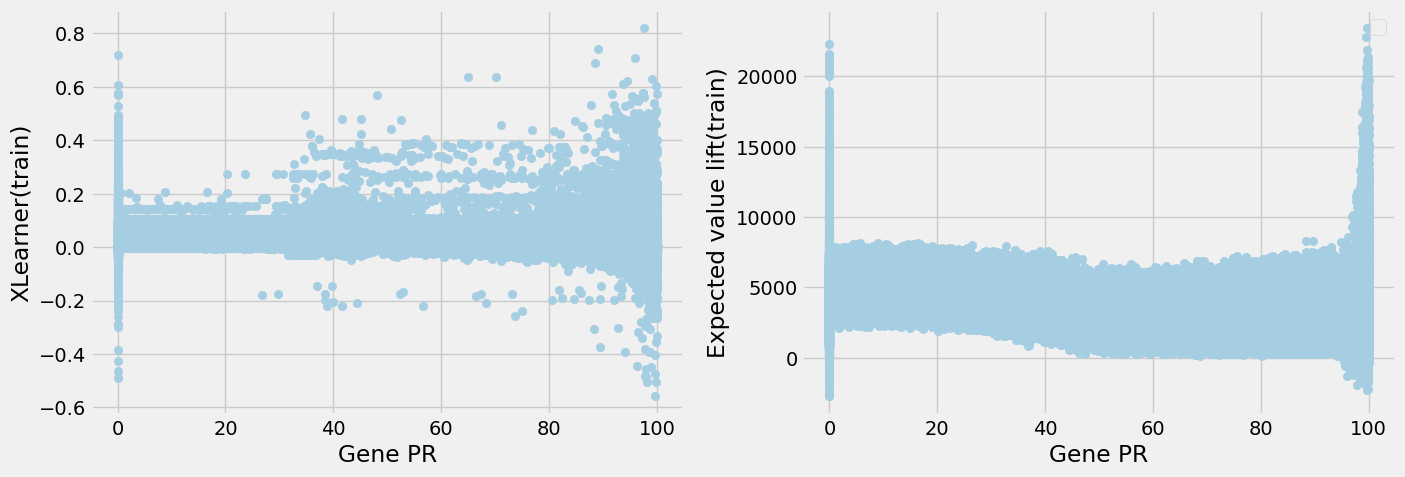

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(res.iloc[:,0], res['X_te'], label="Uplift")
plt.xlabel('Gene PR')
plt.ylabel('XLearner(train)')
plt.subplot(122)
plt.scatter(res.iloc[:,0],train['Gi'])
plt.xlabel('Gene PR')
plt.ylabel('Expected value lift(train)')
plt.legend()

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','跨售行為',	'Uplift_mean']]
auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)

Uplift_mean    16628.908928
Random         16303.870523
dtype: float64

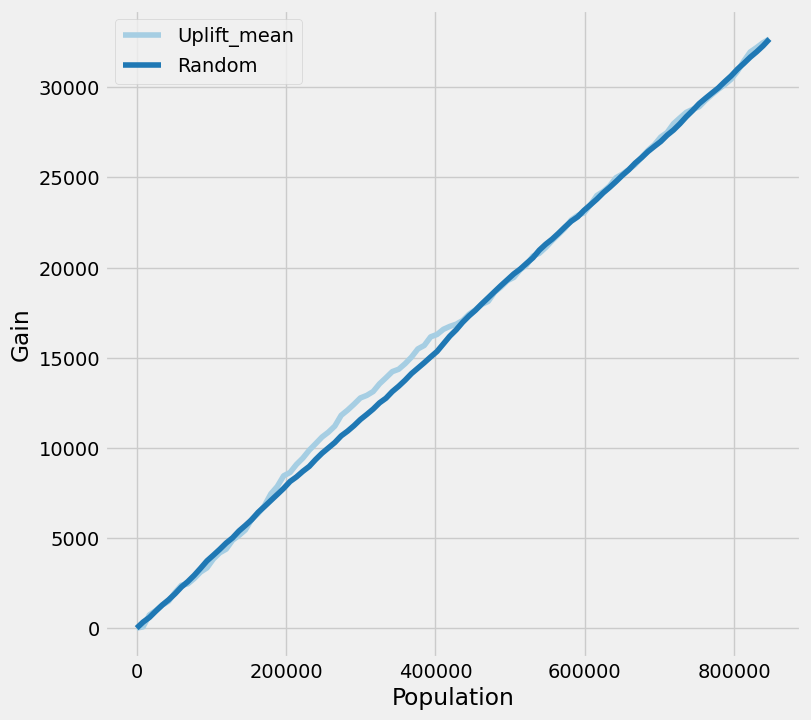

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res
T =T[['換匯發送名單','跨售行為',	'Uplift_mean']]
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=10)

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','跨售行為',	'X_te']]
auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)

X_te      38275.491565
Random    16303.870523
dtype: float64

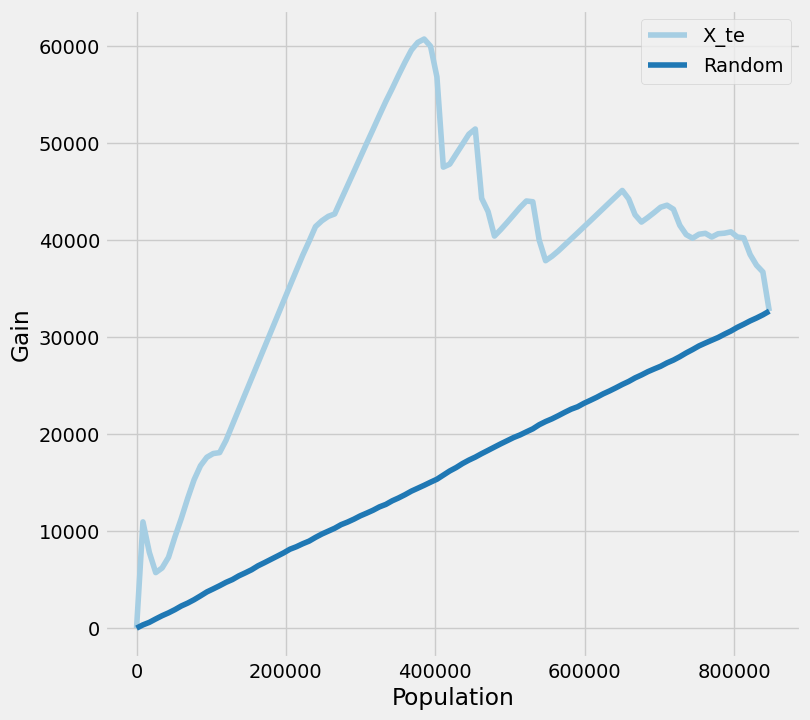

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res
T =T[['換匯發送名單','跨售行為',	'X_te']]
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=10)

Value_X    8.146960e+08
Random     7.370523e+08
dtype: float64


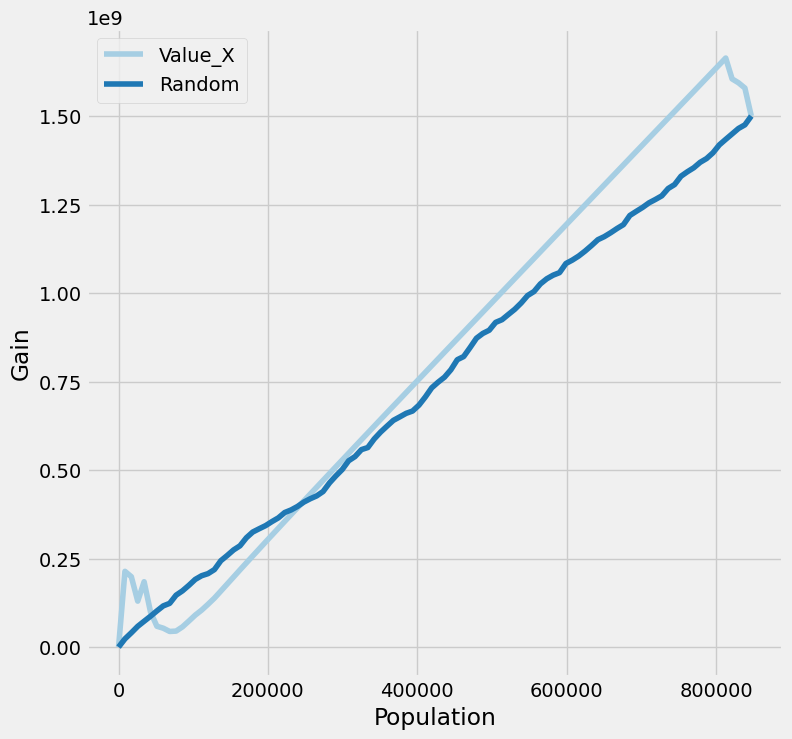

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','TOTALNTAMOUNT',	'Value_X']]
print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=42))
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=10)

Gi        4.354172e+08
Random    7.370523e+08
dtype: float64


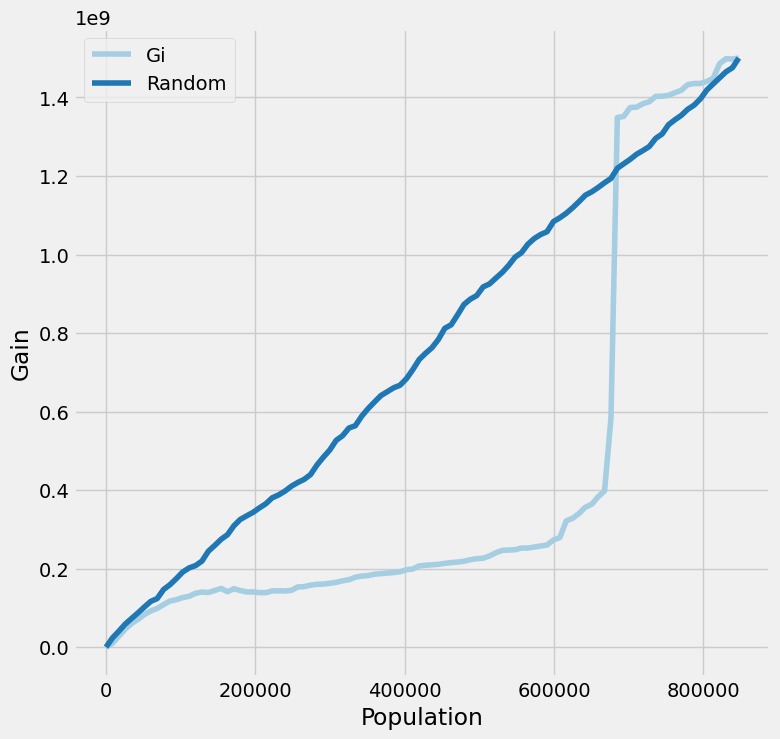

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =train[['換匯發送名單','TOTALNTAMOUNT',	'Gi']]
print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=42))
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=10)

#Validation

In [10]:
#RAM限制無法使用平行方式運算，若環境更好可以考慮加速
%%time
import pickle
import pandas as pd

def load_and_predict(i, df):
    model_path = f"/content/drive/MyDrive/Model/CasualML_uplift_202309_{i}.pkl"
    model = pickle.load(open(model_path, "rb"))
    df_res = model.predict(val_data[X_names].values, full_output=True)
    df[f'Uplift_{i}|T=0'] = df_res.iloc[:, 0]
    df[f'Uplift_{i}|T=1'] = df_res.iloc[:, 1]
    print(f'Finish running uplift_202309_{i}')
    return df

# 循环运行五个模型
result = pd.DataFrame()
for i in range(1, 6):
    result = load_and_predict(i, result)

# 计算均值
T_cols = [f'Uplift_{i}|T=0' for i in range(1, 6)]
T1_cols = [f'Uplift_{i}|T=1' for i in range(1, 6)]

res = val_data[['UNINO','換匯基因標籤','換匯發送名單','TOTALNTAMOUNT','跨售行為']].reset_index()
#res['跨售行為'] = val_data['跨售行為'].drop_index()
res['Uplift_mean|T=0'] = result[T_cols].mean(axis=1)
res['Uplift_mean|T=1'] = result[T1_cols].mean(axis=1)
res['Uplift_mean'] = res['Uplift_mean|T=1'] - res['Uplift_mean|T=0']

# 结果
res

Finish running uplift_202309_1
Finish running uplift_202309_2
Finish running uplift_202309_3
Finish running uplift_202309_4
Finish running uplift_202309_5
CPU times: user 1min 53s, sys: 6.13 s, total: 1min 59s
Wall time: 1min 58s


,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean,X_te,Value_X,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,L2718876160,71.3226,0,0,0.0,0.003408,0.019764,0.016356,0.000109,14.873915,846.895039,-46.402974,800.492065
1,N2724881730,29.8271,0,0,NaN,0.002298,0.035008,0.032710,0.000301,14.421602,849.506057,-365.478549,484.027507
2,B1799016720,51.4779,0,0,NaN,0.002207,0.036212,0.034005,0.000301,14.438950,851.287137,825.558680,1676.845818
3,C1799144080,63.5834,0,0,NaN,0.002572,0.034241,0.031670,0.000225,15.057341,854.156800,30.064906,884.221706
4,Y1721195810,86.3273,0,0,NaN,0.002926,0.031871,0.028944,0.000502,16.078111,843.453993,314.037629,1157.491622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211815,D1793263990,52.9331,0,0,NaN,0.002229,0.036778,0.034549,0.000301,14.430565,851.287137,4361.632648,5212.919785
211816,T2711975880,75.7352,0,0,NaN,0.003125,0.024984,0.021860,-0.000008,14.601819,847.401349,-113.057550,734.343798
211817,F1700999350,62.4016,0,0,NaN,0.002840,0.030700,0.027860,0.000228,14.467434,850.956490,-4412.076489,-3561.119998
211818,F1749270570,48.0369,0,0,NaN,0.002487,0.027078,0.024591,0.000064,14.507939,849.772429,640.469109,1490.241539


In [20]:
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean,X_te,Value_X,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,L2718876160,71.3226,0,0,0,0.003408,0.019764,0.016356,0.000109,14.873915,846.895039,-46.402974,800.492065
1,N2724881730,29.8271,0,0,0,0.002298,0.035008,0.032710,0.000301,14.421602,849.506057,-365.478549,484.027507
2,B1799016720,51.4779,0,0,0,0.002207,0.036212,0.034005,0.000301,14.438950,851.287137,825.558680,1676.845818
3,C1799144080,63.5834,0,0,0,0.002572,0.034241,0.031670,0.000225,15.057341,854.156800,30.064906,884.221706
4,Y1721195810,86.3273,0,0,0,0.002926,0.031871,0.028944,0.000502,16.078111,843.453993,314.037629,1157.491622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211815,D1793263990,52.9331,0,0,0,0.002229,0.036778,0.034549,0.000301,14.430565,851.287137,4361.632648,5212.919785
211816,T2711975880,75.7352,0,0,0,0.003125,0.024984,0.021860,-0.000008,14.601819,847.401349,-113.057550,734.343798
211817,F1700999350,62.4016,0,0,0,0.002840,0.030700,0.027860,0.000228,14.467434,850.956490,-4412.076489,-3561.119998
211818,F1749270570,48.0369,0,0,0,0.002487,0.027078,0.024591,0.000064,14.507939,849.772429,640.469109,1490.241539


In [ ]:
#Load model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202309.pkl', 'rb') as file:
    # A new file will be created
    X_learner = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X_te = X_learner.effect(val_data[X_names])
X_te

array([1.09198452e-04, 3.01121903e-04, 3.00916648e-04, ...,
       2.27914883e-04, 6.38033281e-05, 3.17264941e-04])

In [ ]:
#Save model
import pickle
#Value_EconML_X_202304.pkl One stage X Learner
with open('/content/drive/MyDrive/Model/Value_EconML_X_202309.pkl', 'rb') as file:
    # A new file will be created
    X_learner_value = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X = X_learner_value.effect(val_data[X_names])
X

array([14.87391451, 14.42160184, 14.43895027, ..., 14.46743354,
       14.50793916, 14.44404642])

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_RF_202309.pkl', 'rb') as file:
    # A new file will be created
    est_2 = pickle.load(file)

In [ ]:
t_pred = est_2.predict(val_data[X_names])
t_pred

array([[846.89503919],
       [849.50605659],
       [851.28713732],
       ...,
       [850.9564905 ],
       [849.77242946],
       [851.01621119]])

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_CF_202309.pkl', 'rb') as file:
    est = pickle.load(file)

In [ ]:
# Get treatment effect and its confidence interval
te_pred = est.effect(val_data[X_names])
te_pred

array([  -46.40297412,  -365.47854923,   825.55868042, ...,
       -4412.07648875,   640.46910946,  2367.47457934])

In [7]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202309_results.csv', index_col = 0)
res['X_te'] = X_te
res['Value_X'] = X
res['E(V)|T = 0, D = 1'] = t_pred
res['te'] = te_pred
res['E(V)|T = 1, D = 1'] = res['E(V)|T = 0, D = 1'] + res['te']
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean,X_te,Value_X,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,L2718876160,71.3226,0,0,-1,-0.995325,-0.996728,-0.001403,0.000109,14.873915,846.895039,-46.402974,800.492065
1,N2724881730,29.8271,0,0,-1,-0.999824,-0.993319,0.006505,0.000301,14.421602,849.506057,-365.478549,484.027507
2,B1799016720,51.4779,0,0,-1,-0.999824,-0.993319,0.006505,0.000301,14.438950,851.287137,825.558680,1676.845818
3,C1799144080,63.5834,0,0,-1,-0.999443,-0.998630,0.000813,0.000225,15.057341,854.156800,30.064906,884.221706
4,Y1721195810,86.3273,0,0,-1,-0.992592,-0.989825,0.002768,0.000502,16.078111,843.453993,314.037629,1157.491622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211815,D1793263990,52.9331,0,0,-1,-0.999824,-0.993319,0.006505,0.000301,14.430565,851.287137,4361.632648,5212.919785
211816,T2711975880,75.7352,0,0,-1,-0.993126,-0.988771,0.004355,-0.000008,14.601819,847.401349,-113.057550,734.343798
211817,F1700999350,62.4016,0,0,-1,-0.999345,-1.000000,-0.000655,0.000228,14.467434,850.956490,-4412.076489,-3561.119998
211818,F1749270570,48.0369,0,0,-1,-0.999885,-0.995941,0.003944,0.000064,14.507939,849.772429,640.469109,1490.241539


In [21]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202309_results.csv')
#211820 rows × 13 columns

In [22]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202309_results.csv', index_col = 0)
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,Uplift_mean|T=0,Uplift_mean|T=1,Uplift_mean,X_te,Value_X,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,L2718876160,71.3226,0,0,0,0.003408,0.019764,0.016356,0.000109,14.873915,846.895039,-46.402974,800.492065
1,N2724881730,29.8271,0,0,0,0.002298,0.035008,0.032710,0.000301,14.421602,849.506057,-365.478549,484.027507
2,B1799016720,51.4779,0,0,0,0.002207,0.036212,0.034005,0.000301,14.438950,851.287137,825.558680,1676.845818
3,C1799144080,63.5834,0,0,0,0.002572,0.034241,0.031670,0.000225,15.057341,854.156800,30.064906,884.221706
4,Y1721195810,86.3273,0,0,0,0.002926,0.031871,0.028944,0.000502,16.078111,843.453993,314.037629,1157.491622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211815,D1793263990,52.9331,0,0,0,0.002229,0.036778,0.034549,0.000301,14.430565,851.287137,4361.632648,5212.919785
211816,T2711975880,75.7352,0,0,0,0.003125,0.024984,0.021860,-0.000008,14.601819,847.401349,-113.057550,734.343798
211817,F1700999350,62.4016,0,0,0,0.002840,0.030700,0.027860,0.000228,14.467434,850.956490,-4412.076489,-3561.119998
211818,F1749270570,48.0369,0,0,0,0.002487,0.027078,0.024591,0.000064,14.507939,849.772429,640.469109,1490.241539


In [23]:
val = res.iloc[:,:5]
val['X_te'] = res['X_te']
val['Uplift_mean'] = res['Uplift_mean']
val['E(V)|T = 0, D = 1'] = res['E(V)|T = 0, D = 1']* res['Uplift_mean|T=0']
val['E(V)|T = 1, D = 1'] = res['E(V)|T = 1, D = 1']* res['Uplift_mean|T=1']
val['Gi'] = val['E(V)|T = 1, D = 1']-val['E(V)|T = 0, D = 1']
val['Value_X'] = res['Value_X']
#res['Value_mean'] = pred['Value_mean']
val

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,Uplift_mean,"E(V)|T = 0, D = 1","E(V)|T = 1, D = 1",Gi,Value_X
0,L2718876160,71.3226,0,0,0,0.000109,0.016356,2.886382,15.821093,12.934710,14.873915
1,N2724881730,29.8271,0,0,0,0.000301,0.032710,1.952194,16.944862,14.992668,14.421602
2,B1799016720,51.4779,0,0,0,0.000301,0.034005,1.878888,60.721760,58.842872,14.438950
3,C1799144080,63.5834,0,0,0,0.000225,0.031670,2.196550,30.276918,28.080368,15.057341
4,Y1721195810,86.3273,0,0,0,0.000502,0.028944,2.468264,36.890074,34.421810,16.078111
...,...,...,...,...,...,...,...,...,...,...,...
211815,D1793263990,52.9331,0,0,0,0.000301,0.034549,1.897627,191.720219,189.822592,14.430565
211816,T2711975880,75.7352,0,0,0,-0.000008,0.021860,2.647935,18.347098,15.699164,14.601819
211817,F1700999350,62.4016,0,0,0,0.000228,0.027860,2.416851,-109.325680,-111.742531,14.467434
211818,F1749270570,48.0369,0,0,0,0.000064,0.024591,2.113795,40.353463,38.239667,14.507939


In [24]:
import pandas as pd
val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202309_results_all.csv')
val = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202309_results_all.csv', index_col = 0)
val

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,Uplift_mean,"E(V)|T = 0, D = 1","E(V)|T = 1, D = 1",Gi,Value_X
0,L2718876160,71.3226,0,0,0,0.000109,0.016356,2.886382,15.821093,12.934710,14.873915
1,N2724881730,29.8271,0,0,0,0.000301,0.032710,1.952194,16.944862,14.992668,14.421602
2,B1799016720,51.4779,0,0,0,0.000301,0.034005,1.878888,60.721760,58.842872,14.438950
3,C1799144080,63.5834,0,0,0,0.000225,0.031670,2.196550,30.276918,28.080368,15.057341
4,Y1721195810,86.3273,0,0,0,0.000502,0.028944,2.468264,36.890074,34.421810,16.078111
...,...,...,...,...,...,...,...,...,...,...,...
211815,D1793263990,52.9331,0,0,0,0.000301,0.034549,1.897627,191.720219,189.822592,14.430565
211816,T2711975880,75.7352,0,0,0,-0.000008,0.021860,2.647935,18.347098,15.699164,14.601819
211817,F1700999350,62.4016,0,0,0,0.000228,0.027860,2.416851,-109.325680,-111.742531,14.467434
211818,F1749270570,48.0369,0,0,0,0.000064,0.024591,2.113795,40.353463,38.239667,14.507939


###Plot

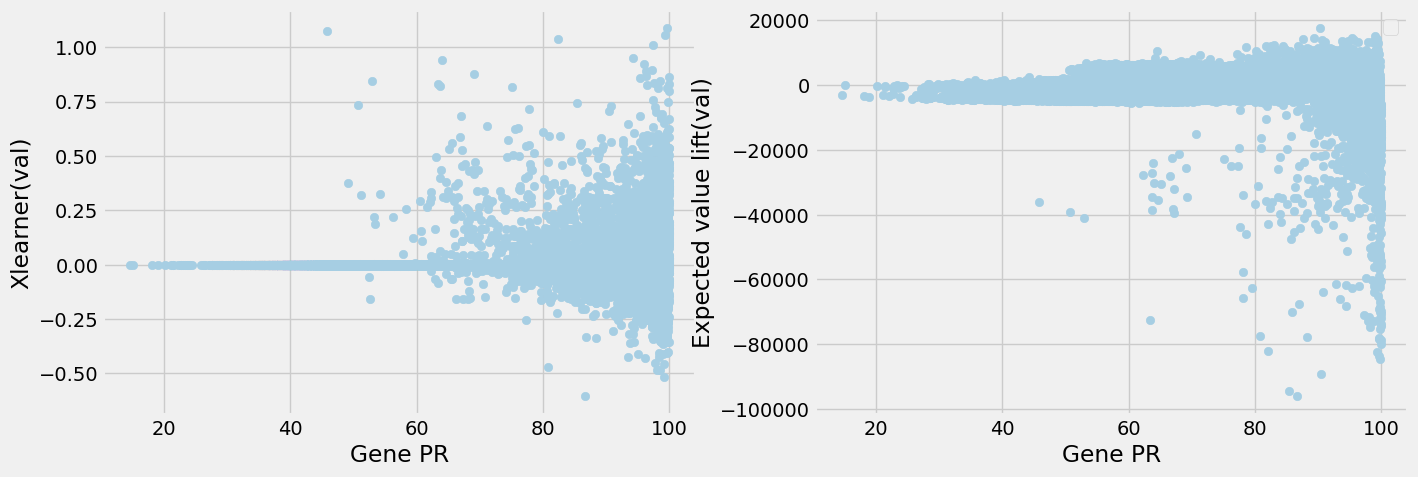

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(val.iloc[:,1], val['X_te'])
plt.xlabel('Gene PR')
plt.ylabel('Xlearner(val)')
plt.subplot(122)
plt.scatter(val.iloc[:,1], val['Gi'])
plt.xlabel('Gene PR')
plt.ylabel('Expected value lift(val)')
plt.legend()

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = val
T =T[['換匯發送名單','跨售行為',	'X_te']]
cumgain = get_cumgain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)
cumgain

/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

,X_te,Random
0,0.000000,0.000000
1,-0.017544,0.000000
2,-0.070175,0.000000
3,-0.157895,0.000000
4,-0.280702,0.000000
...,...,...
211816,7240.019407,7240.122939
211817,7240.061633,7240.165166
211818,7240.103859,7240.103859
211819,7240.146086,7240.146086


Uplift_mean    3379.198441
Random         1802.023568
dtype: float64


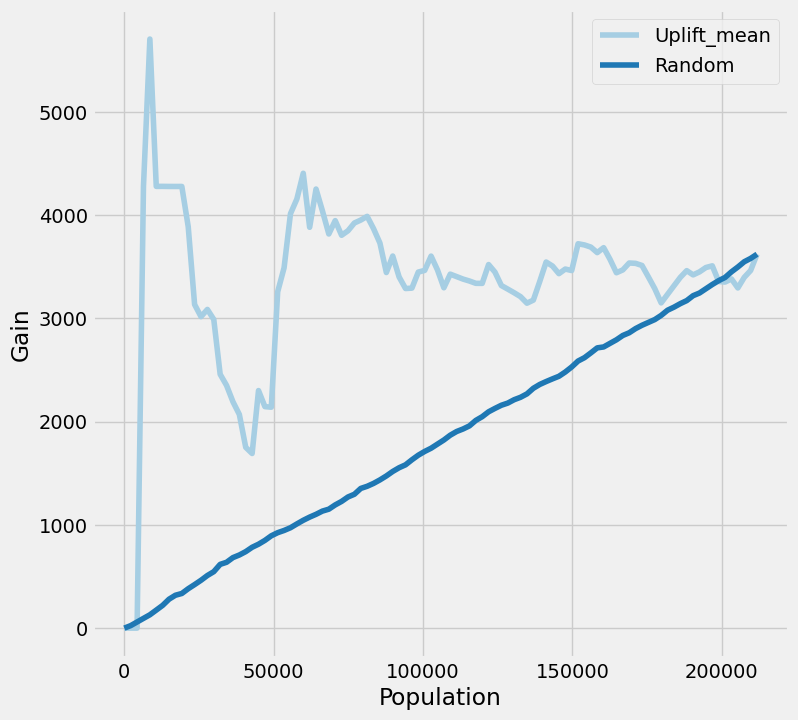

In [25]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T = res
T =T[['換匯發送名單','跨售行為',	'Uplift_mean']]
print(auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=22))
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=22)

X_te      1992.766260
Random    1802.023568
dtype: float64


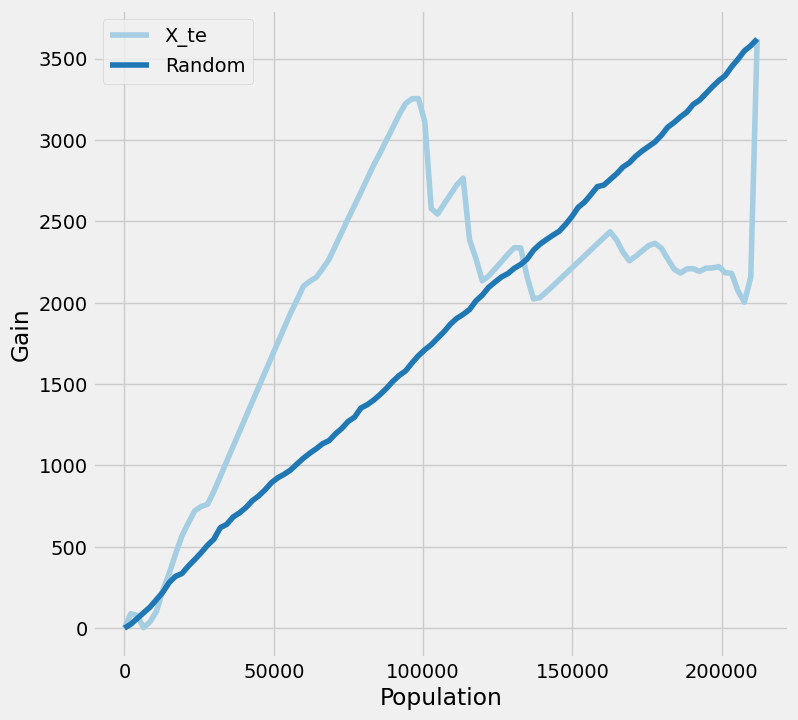

In [26]:
from causalml.metrics import plot_gain, get_cumgain
T = res[['換匯發送名單','跨售行為',	'X_te']]
print(auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=22))
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=22)

Value_X    0.195034
Random     0.503989
dtype: float64


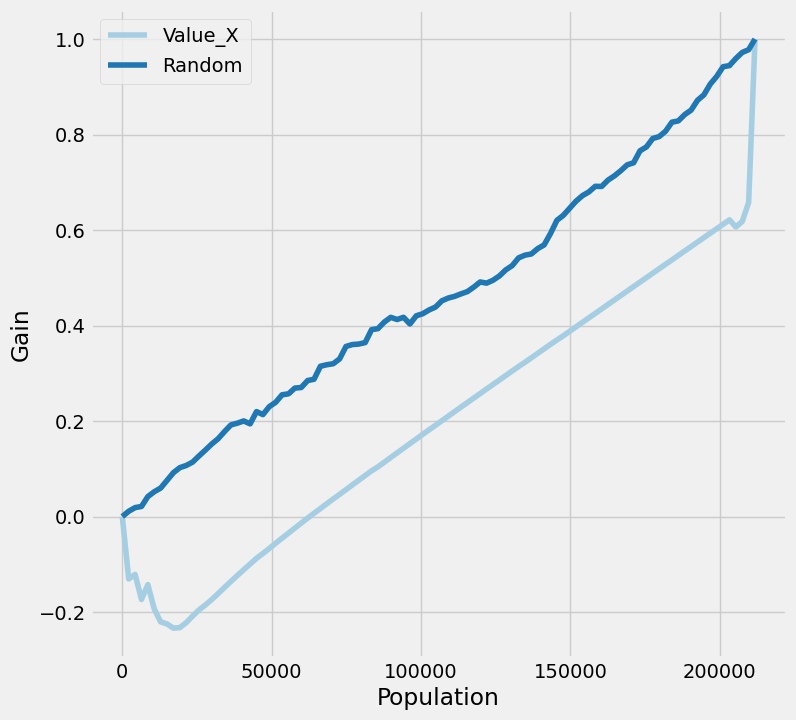

In [27]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','TOTALNTAMOUNT',	'Value_X']]
print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=200))
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=200)

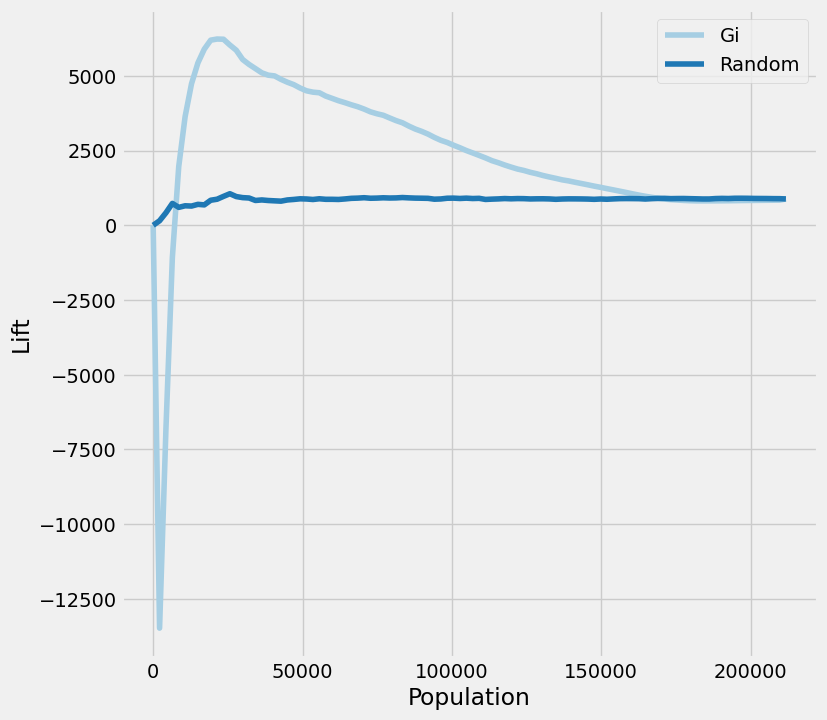

In [32]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score, plot_lift
T =val[['換匯發送名單','TOTALNTAMOUNT',	'Gi']]
#print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=42))
#plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=42)
plot_lift(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', random_seed=42)

### BY percentile

In [ ]:
!pip install scikit-uplift

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 884.3 kB/s eta 0:00:00


In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
#import causalml
import random

%matplotlib inline
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score, weighted_average_uplift

In [ ]:
from sklift.metrics import uplift_by_percentile
val['跨售行為'] = [0 if x == -1 else x for x in val['跨售行為']]
uplift_by_perc_df =  uplift_by_percentile(
    val["跨售行為"],
    val["X_te"],
    val["換匯發送名單"],
    strategy="overall",
    total=False,
    std=True,
    bins=10
)

uplift_by_perc_df

,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,1829,19353,0.050301,0.020307,0.029994,0.005111,0.001014,0.005210
10-20,353,20829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20-30,95,21087,0.000000,0.000047,-0.000047,0.000000,0.000047,0.000047
30-40,86,21096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40-50,905,20277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50-60,1097,20085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60-70,891,20291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
70-80,581,20601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80-90,873,20309,0.000000,0.000049,-0.000049,0.000000,0.000049,0.000049


In [ ]:
uplift_by_percentile(
        val["跨售行為"],
        val['Value_X'],
        val["換匯發送名單"],
        strategy="overall",
        total=False,
        std=True,
        bins=10
    )

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,6368,14814,0.016803,0.027542,-0.010739,0.001611,0.001345,0.002098
10-20,1049,20133,0.001907,0.002632,-0.000726,0.001347,0.000361,0.001394
20-30,6,21176,0.000000,0.001511,-0.001511,0.000000,0.000267,0.000267
30-40,2,21180,0.000000,0.001275,-0.001275,0.000000,0.000245,0.000245
40-50,0,21182,NaN,0.000472,NaN,NaN,0.000149,NaN
50-60,1,21181,0.000000,0.000330,-0.000330,0.000000,0.000125,0.000125
60-70,0,21182,NaN,0.000378,NaN,NaN,0.000134,NaN
70-80,0,21182,NaN,0.000000,NaN,NaN,0.000000,NaN
80-90,0,21182,NaN,0.000000,NaN,NaN,0.000000,NaN


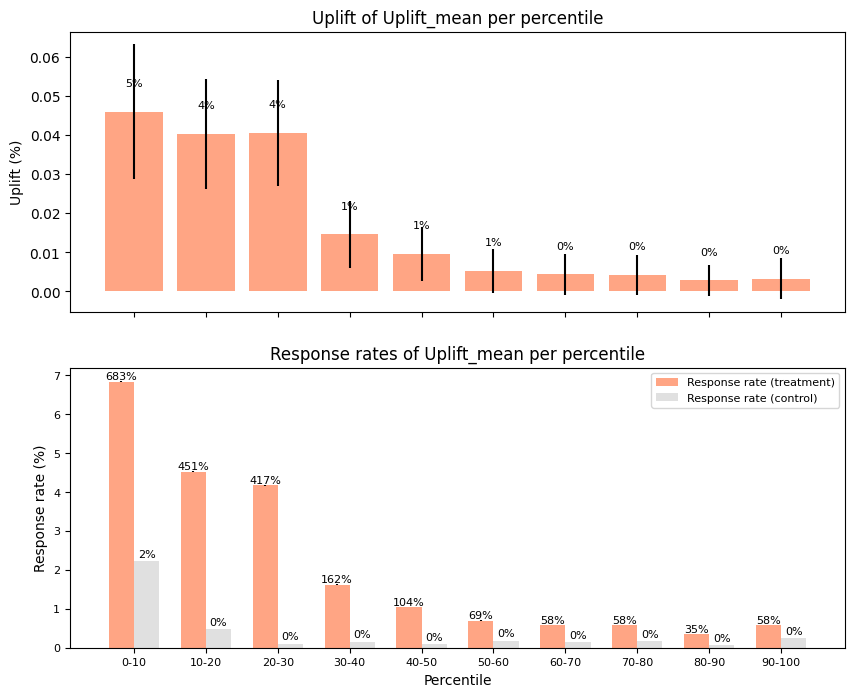

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklift.metrics import uplift_by_percentile

def plot_uplift_by_percentile(df, metric_column, bins=10):
    df['跨售行為'] = [0 if x == -1 else x for x in df['跨售行為']]

    # Fill NaN values in the metric_column with a specific value (e.g., 0)
    df[metric_column].fillna(0, inplace=True)

    uplift_by_perc_df = uplift_by_percentile(
        df["跨售行為"],
        df[metric_column],
        df["換匯發送名單"],
        strategy="by_group",
        total=False,
        std=True,
        bins=bins
    )

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot the first graph (Uplift)
    bars1 = ax1.bar(
        uplift_by_perc_df.index,
        uplift_by_perc_df.uplift,
        yerr=uplift_by_perc_df.std_uplift * 2,
        color='coral',
        alpha=0.7
    )

    ax1.set_title(f'Uplift of {metric_column} per percentile', fontsize=12)
    ax1.set_ylabel('Uplift (%)', fontsize=10)

    # Adding smaller text labels on each bar for Uplift
    for bar, label in zip(bars1, uplift_by_perc_df.uplift):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.006, f'{round(label * 100)}%', ha='center', va='bottom', fontsize=8)
        else:
            ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.006, 'NaN', ha='center', va='bottom', fontsize=8)


    # Plot the second graph (Response Rates for Treatment and Control)
    bar_width = 0.35
    index = np.arange(len(uplift_by_perc_df.index))

    bars2_treatment = ax2.bar(
        index - bar_width/2,
        uplift_by_perc_df.response_rate_treatment * 100,
        bar_width,
        label="Response rate (treatment)",
        color='coral',
        yerr=uplift_by_perc_df.std_treatment * 2,
        alpha=0.7
    )

    bars2_control = ax2.bar(
        index + bar_width/2,
        uplift_by_perc_df.response_rate_control * 100,
        bar_width,
        label="Response rate (control)",
        color='lightgrey',
        yerr=uplift_by_perc_df.std_control * 2,
        alpha=0.7
    )

    ax2.set_title(f'Response rates of {metric_column} per percentile', fontsize=12)
    ax2.set_xlabel('Percentile', fontsize=10)
    ax2.set_ylabel('Response rate (%)', fontsize=10)
    ax2.legend(fontsize=8)

    # Adding smaller text labels on each bar for Response Rates (Treatment)
    for bar, label in zip(bars2_treatment, uplift_by_perc_df.response_rate_treatment * 100):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.006, f'{round(label * 100)}%', ha='center', va='bottom', fontsize=8)
        else:
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.006, 'NaN', ha='center', va='bottom', fontsize=8)
    # Adding smaller text labels on each bar for Response Rates (Control)
    for bar, label in zip(bars2_control, uplift_by_perc_df.response_rate_control * 100):
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{round(label)}%', ha='center', va='bottom', fontsize=8)

    # Set smaller font size for tick labels
    ax2.tick_params(axis='both', which='major', labelsize=8)

    # Ensure that the y-axis starts from 0
    ax2.set_ylim(bottom=0)

    plt.show()

# Usage example for 'Uplift_mean' column
plot_uplift_by_percentile(val, 'Uplift_mean')

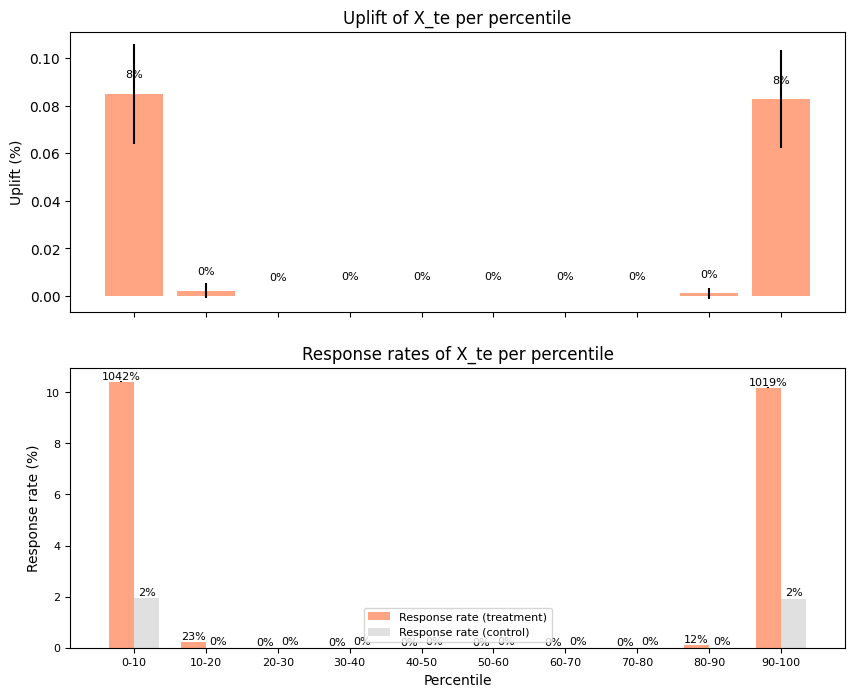

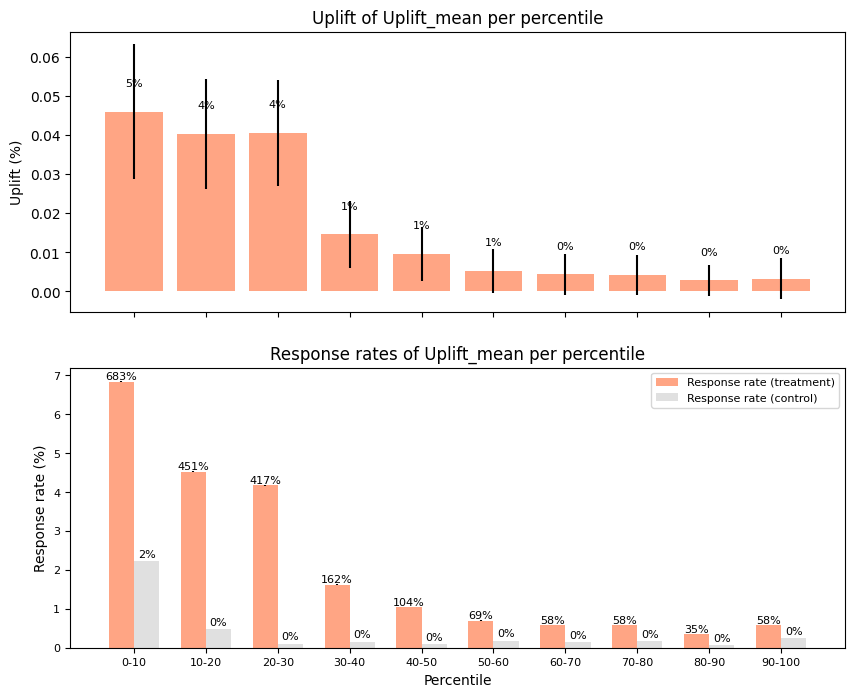

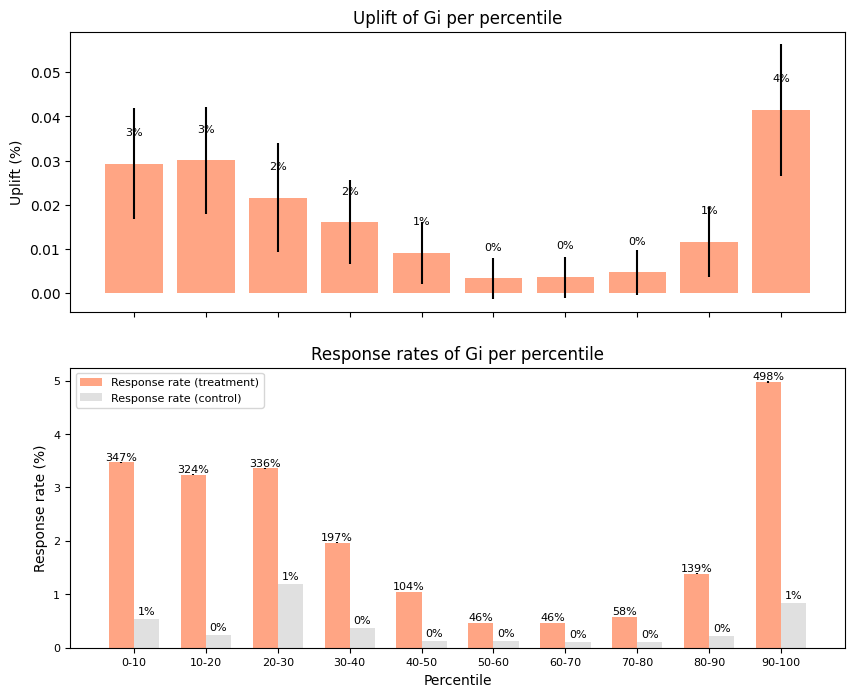

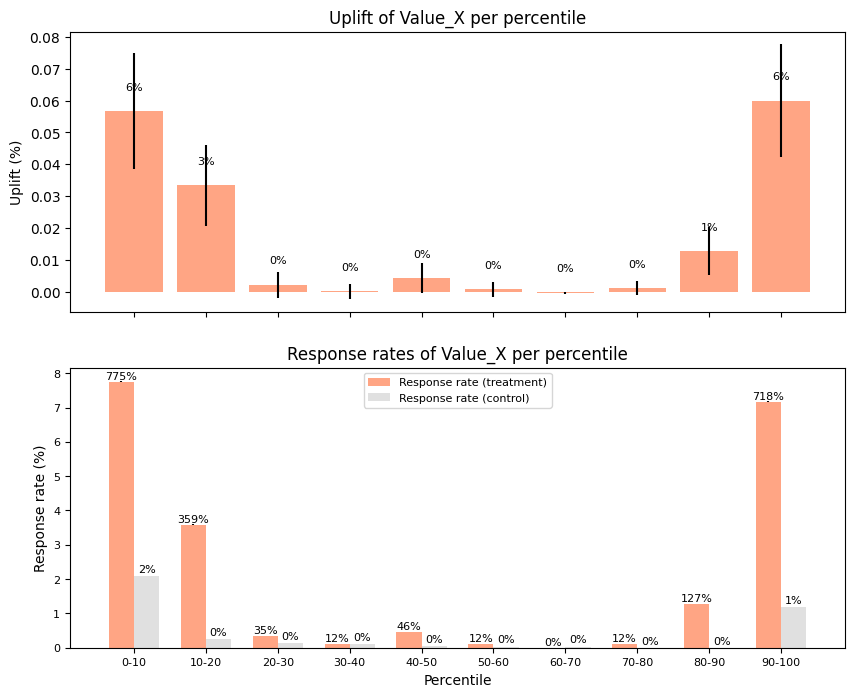

In [ ]:
for cols in ['X_te', 'Uplift_mean', 'Gi', 'Value_X']:
  plot_uplift_by_percentile(val, cols)